Populating the interactive namespace from numpy and matplotlib


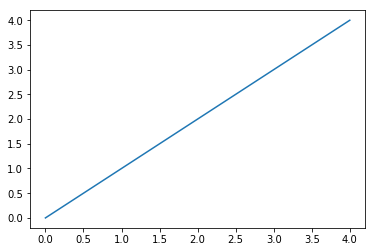

In [2]:
%pylab inline
plot(arange(5))

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
loans = pd.read_csv("LOAN-train.csv")

In [4]:
loans.head(6) # check first 6 lines of data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
loans.describe() # numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
print(loans['Property_Area'].head(7)) # looking at a specific column of the data

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
5    Urban
6    Urban
Name: Property_Area, dtype: object


In [13]:
loans['Property_Area'].value_counts() # count occurances of each of the three values

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

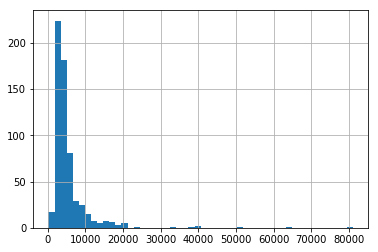

In [14]:
loans['ApplicantIncome'].hist(bins=50)

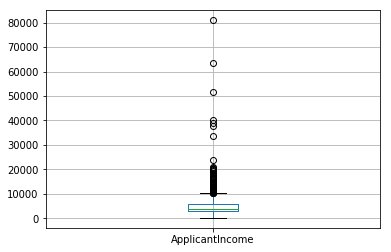

In [15]:
loans.boxplot(column='ApplicantIncome')

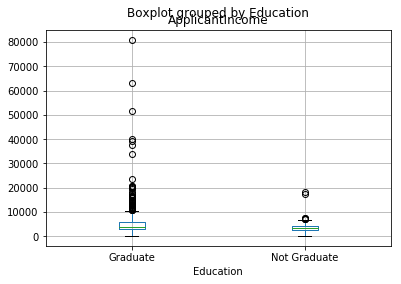

In [16]:
loans.boxplot(column='ApplicantIncome', by='Education')

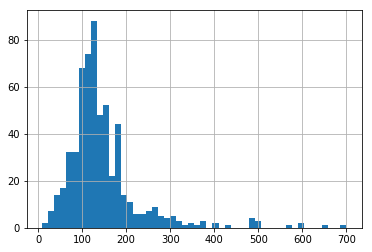

In [17]:
loans['LoanAmount'].hist(bins=50)

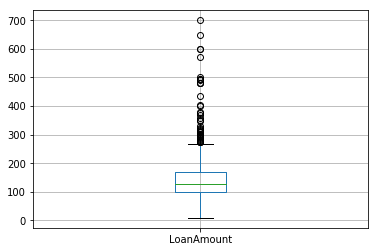

In [18]:
loans.boxplot(column='LoanAmount')

In [19]:
print('Frequency Rable for Credit History')
temp1 = loans['Credit_History'].value_counts(ascending=True)
print(temp1)

Frequency Rable for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [21]:
print("\nProbability of getting a loan for each Credit History class: ")
temp2 = loans.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print(temp2)


Probability of getting a loan for each Credit History class: 
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


In [23]:
# Adding gender

print("\nProbability of getting a loan for each Credit History class BY GENDER: ")
temp2gender = loans.pivot_table(values='Loan_Status',index=['Credit_History', 'Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print(temp2gender)


Probability of getting a loan for each Credit History class BY GENDER: 
Credit_History  Gender
0.0             Female    0.058824
                Male      0.086957
1.0             Female    0.761905
                Male      0.803665
Name: Loan_Status, dtype: float64


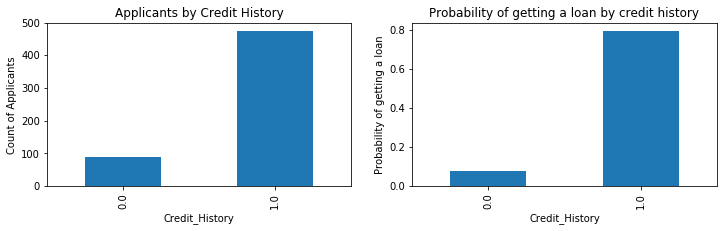

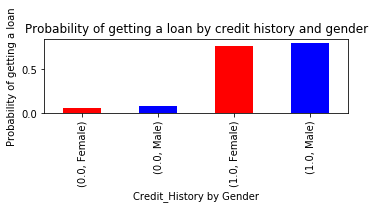

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting a loan')
ax2.set_title("Probability of getting a loan by credit history")

fig2 = plt.figure(2)
fig2 = plt.figure(figsize=(12,3))
ax3 = fig2.add_subplot(223)
temp2gender.plot(kind='bar', color=['red','blue'])
ax3.set_xlabel('Credit_History by Gender')
ax3.set_ylabel('Probability of getting a loan')
ax3.set_title('Probability of getting a loan by credit history and gender')